## Using TensorFlow and Keras to perform Regression analysis on our dataset.

In [1]:
# Dependencies.
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# ML
import tensorflow as tf

In [2]:
# Main dataset.
df = pd.read_csv('ds31_all_per_capita_emissions.csv')
df.head()

,Country,Year,Life Ladder,Temperature,Clean Water,PM2.5,pc Greenhouse Gas Emissions,pc CO2 Emissions
0,Afghanistan,2010,4.758,14.629,48.28708,52.49585,0.001539,0.287738
1,Afghanistan,2011,3.832,16.487,50.82785,57.09972,0.001947,0.401953
2,Afghanistan,2012,3.783,14.373,53.40352,55.46611,0.002142,0.327922
3,Afghanistan,2013,3.572,16.156,56.01404,59.62277,0.002318,0.261570
4,Afghanistan,2014,3.131,15.647,58.65937,62.72192,0.002536,0.232968


In [3]:
# Drop any and all NaN values.
df = df.dropna()
df.head()

,Country,Year,Life Ladder,Temperature,Clean Water,PM2.5,pc Greenhouse Gas Emissions,pc CO2 Emissions
0,Afghanistan,2010,4.758,14.629,48.28708,52.49585,0.001539,0.287738
1,Afghanistan,2011,3.832,16.487,50.82785,57.09972,0.001947,0.401953
2,Afghanistan,2012,3.783,14.373,53.40352,55.46611,0.002142,0.327922
3,Afghanistan,2013,3.572,16.156,56.01404,59.62277,0.002318,0.261570
4,Afghanistan,2014,3.131,15.647,58.65937,62.72192,0.002536,0.232968


In [4]:
# Split values.
X = df.drop(columns=['Life Ladder', 'Country'])
y = df['Life Ladder']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)
print(X_train.shape); print(X_test.shape)

(661, 6)
(221, 6)


In [5]:
# Create scaler instance and fit training data.
X_scaler = StandardScaler().fit(X_train)
# Scale the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [6]:
# View standardization.
X_train_scaled[:5]

array([[-1.13800983, -0.05611652, -2.76405841,  1.58719269, -0.94682994,
        -0.96587155],
       [ 0.39479608, -0.66560837,  0.62411709, -0.18825802, -0.22440721,
        -0.09148377],
       [-1.52121131, -0.18010211,  0.54899953, -0.75682623,  0.22963826,
        -0.08405573],
       [-1.52121131,  0.98624727,  0.01121535, -0.20917319, -0.88594503,
        -0.84870251],
       [-0.37160688, -0.63997182,  0.65846682, -1.18137332,  2.12637522,
         0.62443745]])

In [7]:
# Define model input.
input_features = len(X_train_scaled[0])
nodes1 = 500
nodes2 = 100
nodes3 = 50

# Build the model.
nn = tf.keras.models.Sequential()

nn.add(tf.keras.layers.Dense(units=nodes1, input_dim=input_features, activation='relu'))
nn.add(tf.keras.layers.Dense(units=nodes2, activation='relu'))
nn.add(tf.keras.layers.Dense(units=nodes3, activation='relu'))
nn.add(tf.keras.layers.Dense(units=1)) # activation='sigmoid'))

# Show model summary.
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               3500      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 58,701
Trainable params: 58,701
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Compile the model.
nn.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [9]:
# Batch log for epochs.
from tqdm.keras import TqdmCallback

In [10]:
# Fit the model.
nn.fit(X_train_scaled, y_train, epochs=500, verbose=0, callbacks=[TqdmCallback(verbose=1)])

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

In [11]:
# Predict.
pred = nn.predict(X_test_scaled)
print(np.sqrt(mean_squared_error(y_test, pred)))
pred_values = [x[0] for x in pred]

0.3791718282671284


In [12]:
# DataFrame of predictions.
results = pd.DataFrame(zip(pred_values, y_test), columns=['Predicted', 'Actual'])
results['Difference'] = abs(results['Predicted'] - results['Actual'])
results.head()

,Predicted,Actual,Difference
0,6.481779,6.294,0.187779
1,5.499850,5.856,0.356150
2,7.028787,7.250,0.221213
3,6.079765,6.065,0.014765
4,6.637821,6.965,0.327179


In [13]:
# Style.
from matplotlib import style
style.use('fivethirtyeight')

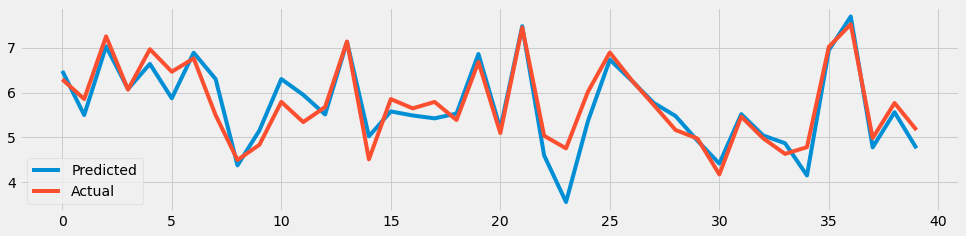

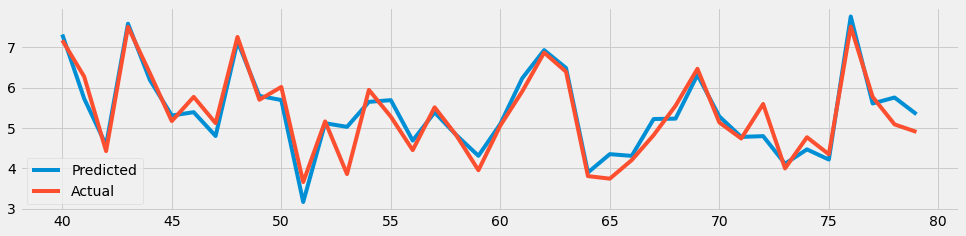

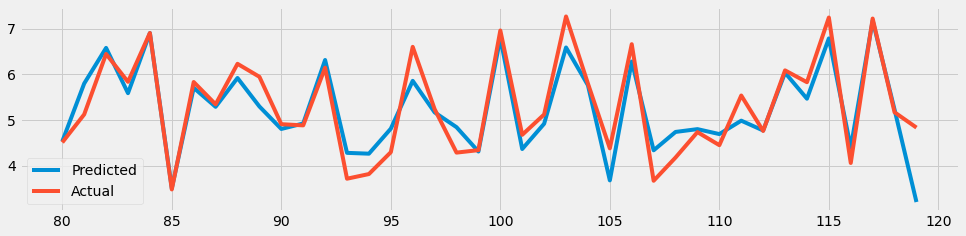

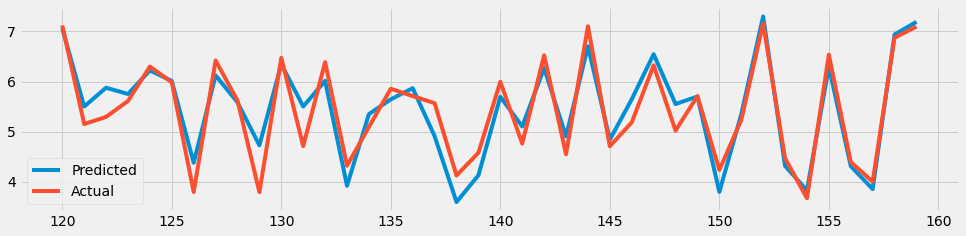

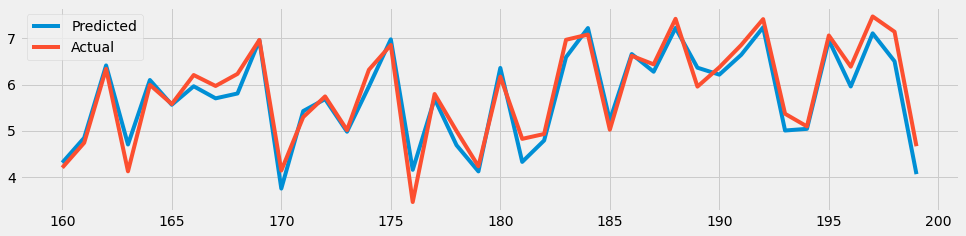

In [14]:
# Try and plot the differences.
bins = [0, 40, 80, 120, 160]
for i in bins:
    results.iloc[i:i+40].plot(y=['Predicted', 'Actual'], figsize=(15,3.5))

In [15]:
# Save results to compare.
results.to_csv('ml_results/34_nn_model.csv')